In [8]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected'
})
cm.get('livereveal')

{u'start_slideshow_at': u'selected', u'theme': u'sky', u'transition': u'zoom'}

# Analysis of JPM Qubit Chips

In [2]:
from numpy import *
from os import path, listdir
from bokeh.plotting import figure, output_notebook, show
from myfunctions import analyze, plotS21


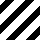
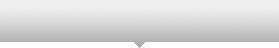
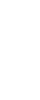
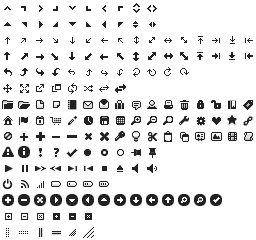
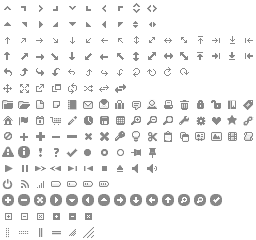
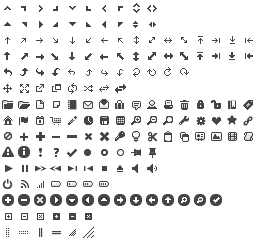
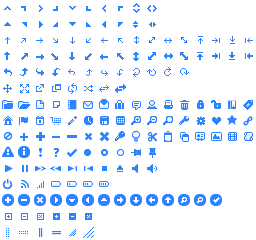
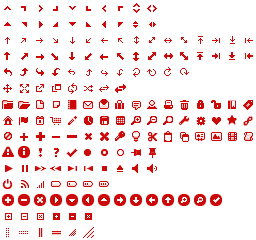
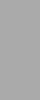
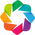
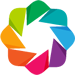
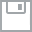
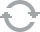
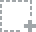
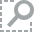
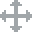
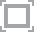
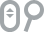

In [3]:
output_notebook()

Let's step through each iteration of wafers and analyze the relevant data

## jpmqubitv1

In [4]:
fullpath = "/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/"
listdir(fullpath)

['5GHz_Cavity Through 7GHz Cavity.s2p',
 '5GHz_Cavity.s2p',
 '5GHz_Cavity_cold.s2p',
 '7GHz Cavity from 6.45 to 6.95.s2p',
 '7GHz Cavity from 6.65 to 6.75.s2p',
 '7GHz Cavity from 6.75 to 7.25.s2p']

### 5 GHz cavity at 3K

In [5]:
results = analyze(path.join(fullpath, '5GHz_Cavity.s2p'))

/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/5GHz_Cavity.s2p
f0 = 4.669324+/- 0.00001 (0.00024%) GHz
kappa = 4940249.38233+/- 142653.96592 (2.9%)
Q = 150.427+/- 0.013 (0.0083%)


### 5GHz Cavity at 250mK

In [6]:
results = analyze(path.join(fullpath, '5GHz_Cavity_cold.s2p'))

/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/5GHz_Cavity_cold.s2p
f0 = 4.67047+/- 0.00000 (4.1e-05%) GHz
kappa = 2132687.66302+/- 24431.29142 (1.1%)
Q = 348.541+/- 0.012 (0.0036%)


### 7GHz Cavity

No clear peak, most likely too high of a Q

In [7]:
files = [ '7GHz Cavity from 6.45 to 6.95.s2p',
 '7GHz Cavity from 6.65 to 6.75.s2p',
 '7GHz Cavity from 6.75 to 7.25.s2p']
results = []

for f in files:
    fig, x, y = plotS21(path.join(fullpath, f))
    show(fig)

/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/7GHz Cavity from 6.45 to 6.95.s2p


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/7GHz Cavity from 6.65 to 6.75.s2p


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/7GHz Cavity from 6.75 to 7.25.s2p


### 5 GHz Cavity Through 7 GHz Cavity
This tells us that we're probably connected to the 7 GHz cavity, but maybe the Q is too high to find it.

In [8]:
result = analyze(path.join(fullpath, '5GHz_Cavity Through 7GHz Cavity.s2p'))

/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv1/5GHz_Cavity Through 7GHz Cavity.s2p
f0 = 4.671226+/- 0.00000 (1.1e-05%) GHz
kappa = 102974.235545+/- 6381.49055 (6.2%)
Q = 7219.754+/- 0.013 (0.00017%)


## jpmqubitv2

## jpmqubitv3

## jpmqubitv4

In [9]:
fullpath = "/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/"
listdir(fullpath)

['1p0 K 5GHz Cavity.s2p',
 '1p2 K 5GHz Cavity.s2p',
 '4p8_GHz-flux-scan',
 '5 GHz Cavity -30dB 100MHz span.s2p',
 '5 GHz Cavity -30dB 10MHz span.s2p',
 '5 GHz Cavity -30dB 50MHz span.s2p',
 '5 GHz Cavity -40dB 500kHz span.s2p',
 '5 GHz Cavity -50dB 500kHz span.s2p',
 '5 GHz Cavity -60dB 500kHz span.s2p',
 '5 GHz Cavity -65dB 500kHz span.s2p',
 '5 GHz Cavity -70dB 500kHz span.s2p',
 '5 GHz Cavity -75dB 500kHz span.s2p',
 '7 GHz Cavity -15dB 0V 10MHz span 250mK.s2p',
 '7 GHz Cavity -15dB 15V 10MHz span 250mK.s2p',
 '7 GHz Cavity -20dB 0V 50MHz span 3K.s2p',
 '7 GHz Cavity -20dB 100MHz span 250mK.s2p',
 '7 GHz Cavity -20dB 10MHz span 250mK.s2p',
 '7 GHz Cavity -20dB 200MHz span 250mK.s2p',
 '7 GHz Cavity -30dB 100MHz span 3K.s2p',
 '7 GHz Cavity -30dB 10MHz span 250mK.s2p',
 'Both 7GHz peaks through 5GHz 3K.s2p',
 'In 7 Out 5 250mK 3GHz span.s2p',
 'In 7 Out 5 250mK 5GHz peaks 500MHz span.s2p',
 'In 7 Out 5 250mK 7GHz peaks 500MHz span.s2p',
 'p0.25 K 5GHz Cavity.s2p',
 'p3 K 5GHz Cavity.

### 5 GHz Cavity at 250mK

In [10]:
files = [
 '5 GHz Cavity -30dB 10MHz span.s2p',
 '5 GHz Cavity -40dB 500kHz span.s2p',
 '5 GHz Cavity -50dB 500kHz span.s2p',
 '5 GHz Cavity -60dB 500kHz span.s2p',
 '5 GHz Cavity -65dB 500kHz span.s2p',
 '5 GHz Cavity -70dB 500kHz span.s2p']
powers = [-30, -40, -50, -60, -65, -70]
results = []
for f in files:
    results.append(analyze(path.join(fullpath, f)))

/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -30dB 10MHz span.s2p
f0 = 4.867664+/- 0.00000 (2.9e-06%) GHz
kappa = 618287.508367+/- 1754.42937 (0.28%)
Q = 1252.998+/- 0.013 (0.001%)


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -40dB 500kHz span.s2p
f0 = 4.86766+/- 0.00000 (5.6e-07%) GHz
kappa = 199855.24242+/- 356.32923 (0.18%)
Q = 3876.366+/- 0.012 (0.00031%)


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -50dB 500kHz span.s2p
f0 = 4.86766+/- 0.00000 (1.7e-06%) GHz
kappa = 202109.923115+/- 1061.22693 (0.53%)
Q = 3833.123+/- 0.012 (0.00032%)


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -60dB 500kHz span.s2p
f0 = 4.867658+/- 0.00000 (5.9e-06%) GHz
kappa = 259199.293687+/- 3828.13223 (1.5%)
Q = 2988.865+/- 0.012 (0.0004%)


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -65dB 500kHz span.s2p
f0 = 4.867659+/- 0.00000 (9.9e-06%) GHz
kappa = 218556.048603+/- 6364.65525 (2.9%)
Q = 3544.683+/- 0.012 (0.00034%)


/Users/calebhowington/Development/Data/jpmqubit/jpmqubitv4/5 GHz Cavity -70dB 500kHz span.s2p
f0 = 4.867723+/- 0.00001 (0.00013%) GHz
kappa = 1375949.72829+/- 114014.34946 (8.3%)
Q = 563.045+/- 0.009 (0.0016%)


In [11]:
for i, result in enumerate(results):
    result['power'] = float(powers[i])
    print(str(powers[i]) + "dBm\t" + "Q = " + str(result['Q']))
    
f0, q, power = [], [], []

for result in results:
    f0.append(result['f0']*1e-9)
    q.append(result['Q'])
    power.append(result['power'])
    

qfig = figure(
        title="Q vs power", 
        x_axis_label = "Power (dBm)",
        y_axis_label = "Q")
    
f0fig = figure(
        title = "Resonance vs Power", 
        x_axis_label = "Power (dBm)",
        y_axis_label = "F0 (GHz)")   

qfig.scatter(power, q)
f0fig.scatter(power, f0)
show(qfig)
show(f0fig)

-30dBm	Q = 1252.99759232
-40dBm	Q = 3876.3662757
-50dBm	Q = 3833.12287897
-60dBm	Q = 2988.86522466
-65dBm	Q = 3544.68304837
-70dBm	Q = 563.045460442
